# Document Classification with Naive Bayes - Lab

## Introduction

In this lesson, you'll practice implementing the Naive Bayes algorithm on your own.

## Objectives

In this lab you will:  

* Implement document classification using Naive Bayes

## Import the dataset

To start, import the dataset stored in the text file `'SMSSpamCollection'`.

In [1]:
from fsds_100719.imports import *

fsds_1007219  v0.7.20 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [5]:
# Your code here`
df = pd.read_csv("SMSSpamCollection",sep='\t',names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Account for class imbalance

To help your algorithm perform more accurately, subset the dataset so that the two classes are of equal size. To do this, keep all of the instances of the minority class (spam) and subset examples of the majority class (ham) to an equal number of examples.

In [6]:
# Your code here
df['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [16]:
val_counts = df['label'].value_counts()
val_counts#.min()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
df.groupby('label').groups

{'ham': Int64Index([   0,    1,    3,    4,    6,    7,   10,   13,   14,   16,
             ...
             5560, 5561, 5562, 5563, 5564, 5565, 5568, 5569, 5570, 5571],
            dtype='int64', length=4825),
 'spam': Int64Index([   2,    5,    8,    9,   11,   12,   15,   19,   34,   42,
             ...
             5492, 5497, 5501, 5524, 5526, 5537, 5540, 5547, 5566, 5567],
            dtype='int64', length=747)}

In [15]:
def undersample(df, col='label', random_state=42):
    val_counts = df[col].value_counts()
    minority_count = val_counts.min()
    
    df2 = pd.DataFrame(columns=df.columns)
    
    for grp, idx in df.groupby(col).groups.items():
        
        df_temp = df.loc[idx].sample(n=minority_count, random_state=random_state)
        df2 = pd.concat([df2, df_temp],axis=0)
        
    return df2

df2 = undersample(df)
df2['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

## Train-test split

Now implement a train-test split on the dataset: 

In [26]:
# Your code here
from sklearn.model_selection import train_test_split
X = df2['text'].copy()
y = df2['label'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=17)
train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

## Create the word frequency dictionary for each class

Create a word frequency dictionary for each class: 

In [33]:
doc = list(train_df.iloc[3])[0]
doc

'New TEXTBUDDY Chat 2 horny guys in ur area 4 just 25p Free 2 receive Search postcode or at gaytextbuddy.com. TXT ONE name to 89693'

In [36]:
bag = {}
words= doc.split()
for word in words:
    bag[word] = bag.get(word,0) + 1
bag

{'New': 1,
 'TEXTBUDDY': 1,
 'Chat': 1,
 '2': 2,
 'horny': 1,
 'guys': 1,
 'in': 1,
 'ur': 1,
 'area': 1,
 '4': 1,
 'just': 1,
 '25p': 1,
 'Free': 1,
 'receive': 1,
 'Search': 1,
 'postcode': 1,
 'or': 1,
 'at': 1,
 'gaytextbuddy.com.': 1,
 'TXT': 1,
 'ONE': 1,
 'name': 1,
 'to': 1,
 '89693': 1}

In [39]:
# Your code her
class_word_freq = {}

classes = train_df['label'].unique()

for class_ in classes:
    temp_df = train_df[train_df['label']==class_]
    
    bag = {}
    
    for row in temp_df.index:
        doc = temp_df['text'][row]
        
        for word in doc.split():
            bag[word] = bag.get(word,0) +1
    class_word_freq[class_] = bag
        
print(class_word_freq.keys())
class_word_freq['spam']

dict_keys(['spam', 'ham'])


{'25p': 6,
 '4': 71,
 'alfie': 1,
 "Moon's": 2,
 'Children': 2,
 'in': 46,
 'need': 3,
 'song': 2,
 'on': 109,
 'ur': 75,
 'mob.': 2,
 'Tell': 2,
 'm8s.': 2,
 'Txt': 45,
 'Tone': 8,
 'charity': 3,
 'to': 461,
 '8007': 15,
 'for': 138,
 'Nokias': 1,
 'or': 149,
 'Poly': 1,
 'polys:': 1,
 'zed': 3,
 '08701417012': 2,
 'profit': 2,
 '2': 116,
 'charity.': 1,
 'New': 12,
 'TEXTBUDDY': 2,
 'Chat': 6,
 'horny': 4,
 'guys': 3,
 'area': 3,
 'just': 41,
 'Free': 23,
 'receive': 23,
 'Search': 2,
 'postcode': 3,
 'at': 21,
 'gaytextbuddy.com.': 2,
 'TXT': 3,
 'ONE': 3,
 'name': 5,
 '89693': 1,
 'all': 20,
 'the': 126,
 'lastest': 1,
 'from': 87,
 'Stereophonics,': 1,
 'Marley,': 1,
 'Dizzee': 1,
 'Racal,': 1,
 'Libertines': 1,
 'and': 90,
 'The': 16,
 'Strokes!': 1,
 'Win': 9,
 'Nookii': 1,
 'games': 3,
 'with': 72,
 'Flirt!!': 1,
 'Click': 2,
 'TheMob': 1,
 'WAP': 6,
 'Bookmark': 1,
 'text': 53,
 '82468': 2,
 'Marvel': 1,
 'Mobile': 21,
 'Play': 5,
 'official': 5,
 'Ultimate': 1,
 'Spider-man':

## Count the total corpus words
Calculate V, the total number of words in the corpus: 

In [45]:
vocab  = set([*class_word_freq['spam'],*class_word_freq['ham']])
V = len(vocab)
V

5958

In [46]:
# # Your code here
# V = [*class_word_freq['spam']]

## Create a bag of words function

Before implementing the entire Naive Bayes algorithm, create a helper function `bag_it()` to create a bag of words representation from a document's text.

In [51]:
# Your code here'
def bag_it(doc):
    bag= {}
    for word in doc.split():
        bag[word] = bag.get(word,0)+1
    return bag

# bag_it(X_train.iloc[0])

## Implementing Naive Bayes

Now, implement a master function to build a naive Bayes classifier. Be sure to use the logarithmic probabilities to avoid underflow.

In [53]:
p_classes = dict(df2['label'].value_counts(normalize=True))
p_classes

{'spam': 0.5, 'ham': 0.5}

In [54]:
# Your code here
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    
    classes = []
    posteriors = []
    
    for class_ in class_word_freq.keys():
        p = np.log(p_classes[class_])
        
        for word in bag.keys():
            num = bag[word] + 1
            denom = class_word_freq[class_].get(word,0) + V
            
            p += np.log(num/denom)
        classes.append(class_)
        posteriors.append(p)
        
    if return_posteriors:
        print(posteriors)
    
    return classes[np.argmax(posteriors)]

## Test your classifier

Finally, test your classifier and measure its accuracy. Don't be perturbed if your results are sub-par; industry use cases would require substantial additional preprocessing before implementing the algorithm in practice.

In [58]:
from sklearn import metrics

In [59]:
# Your code here
y_hat_train = X_train.map(lambda x: classify_doc(x,class_word_freq, p_classes, V))
metrics.accuracy_score(y_train, y_hat_train)

0.2669642857142857

In [61]:
y_hat_test= X_test.map(lambda x: classify_doc(x,class_word_freq, p_classes, V))
metrics.accuracy_score(y_test, y_hat_test)

0.2914438502673797

## Level up (Optional)

Rework your code into an appropriate class structure so that you could easily implement the algorithm on any given dataset.

## Summary

Well done! In this lab, you practiced implementing Naive Bayes for document classification!

# with sklearn now `

In [65]:
from nltk.corpus import stopwords
stop_word = stopwords.words('english')
stop_word

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
X = df2['text']
y = df2['label']

X_train, X_test, y_train,y_test =train_test_split(X, y,random_state=17)
X_train

824     25p 4 alfie Moon's Children in need song on ur...
175     Well, i'm gonna finish my bath now. Have a goo...
4072    I've reached home n i bathe liao... U can call...
629     New TEXTBUDDY Chat 2 horny guys in ur area 4 j...
907     all the lastest from Stereophonics, Marley, Di...
                              ...                        
1425                    Yes.. now only saw your message..
3421    As a valued customer, I am pleased to advise y...
1562    Dnt worry...use ice pieces in a cloth pack.als...
4658    PRIVATE! Your 2003 Account Statement for shows...
3203    Okay lor... Wah... like that def they wont let...
Name: text, Length: 1120, dtype: object

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stop_word)

In [78]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec

<1120x3702 sparse matrix of type '<class 'numpy.int64'>'
	with 13152 stored elements in Compressed Sparse Row format>

In [79]:
X_train.shape

(1120,)

In [80]:
# vectorizer.inverse_transform(X_train_vec[0])

In [81]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_hat_test = model.predict(X_test_vec)

In [82]:
print(metrics.classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       194
        spam       0.95      0.97      0.96       180

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374



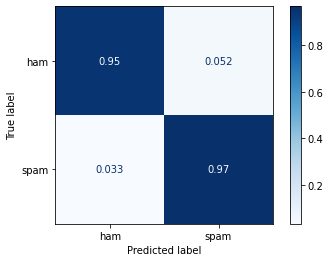

In [84]:
metrics.plot_confusion_matrix(model, X_test_vec, y_test, cmap='Blues',normalize='true')

In [86]:
y_test.value_counts(normalize=True)

ham     0.518717
spam    0.481283
Name: label, dtype: float64